# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv ('Fraud.csv')

In [3]:
subdf_fraud =fraud.sample(n=1000, random_state=42)


In [4]:
subdf_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1000.00000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,240.61300,1.592821e+05,8.431824e+05,8.627471e+05,9.535814e+05,1.041309e+06,0.004000,0.001000
std,141.94869,3.170739e+05,3.009580e+06,3.040937e+06,2.744779e+06,2.782794e+06,0.063151,0.031623
min,1.00000,6.570000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,154.00000,1.337274e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,234.00000,7.311457e+04,1.537213e+04,0.000000e+00,1.053463e+05,1.456695e+05,0.000000,0.000000
75%,333.00000,1.968271e+05,1.013988e+05,1.273140e+05,7.867952e+05,9.976552e+05,0.000000,0.000000
max,692.00000,4.953893e+06,2.655779e+07,2.663956e+07,5.160756e+07,5.150008e+07,1.000000,1.000000


/Users/miguelmendes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


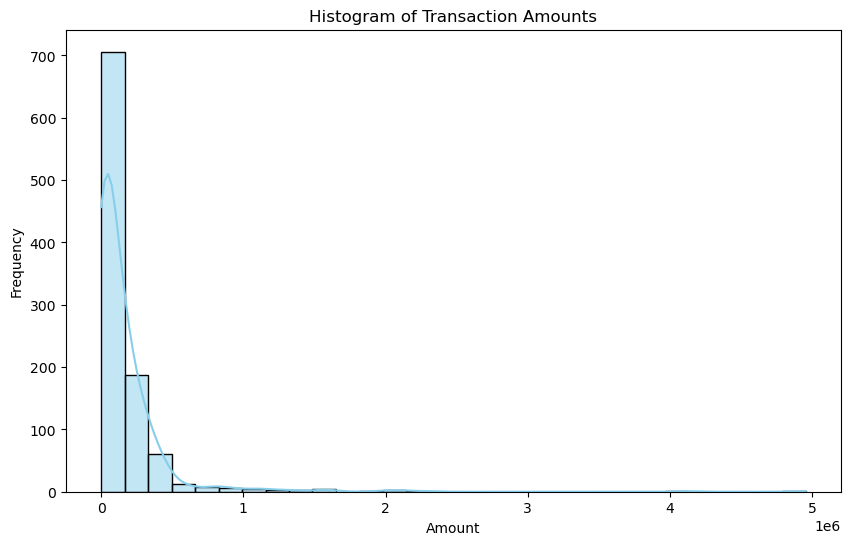

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(subdf_fraud['amount'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


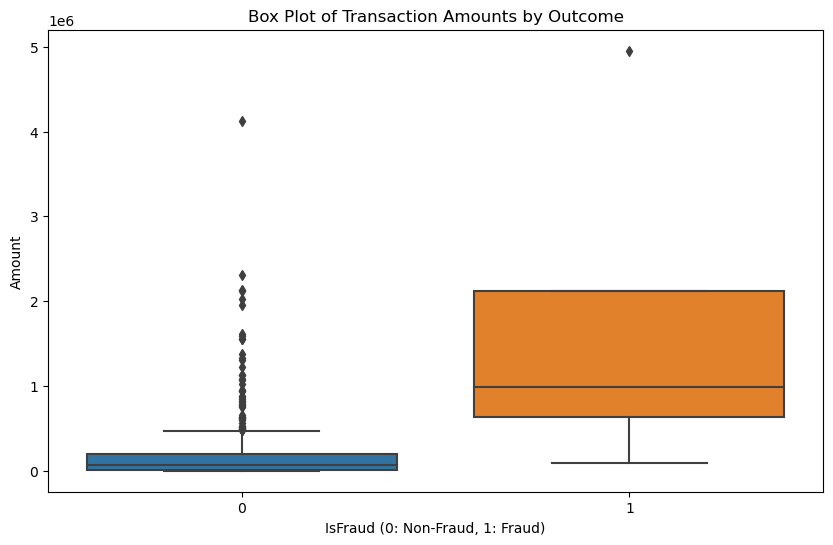

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=subdf_fraud)
plt.title('Box Plot of Transaction Amounts by Outcome')
plt.xlabel('IsFraud (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

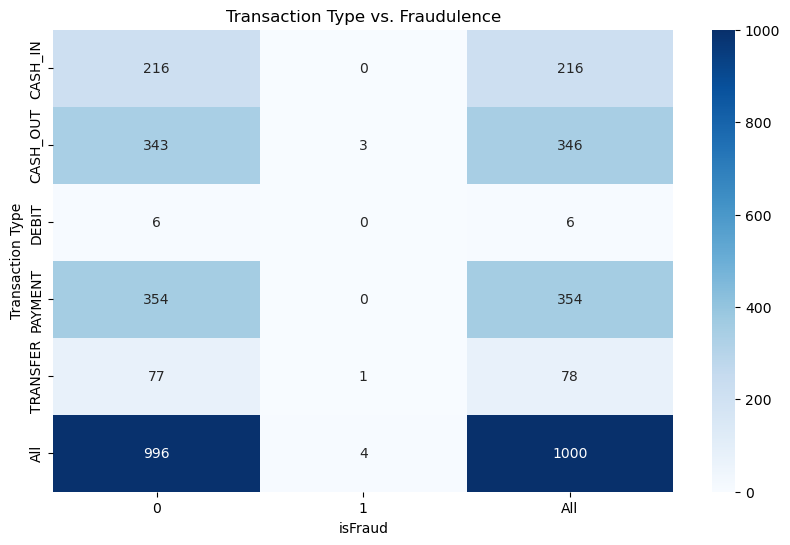

In [7]:
# Create a cross-tabulation between type and isFraud
cross_tab = pd.crosstab(subdf_fraud['type'], subdf_fraud['isFraud'], margins=True)

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Transaction Type vs. Fraudulence')
plt.xlabel('isFraud')
plt.ylabel('Transaction Type')
plt.show()

In [8]:
cross_tab_2 = pd.crosstab(subdf_fraud['isFlaggedFraud'], subdf_fraud['isFraud'], margins=True)
# Plot the cross-tabulation as a heatmap


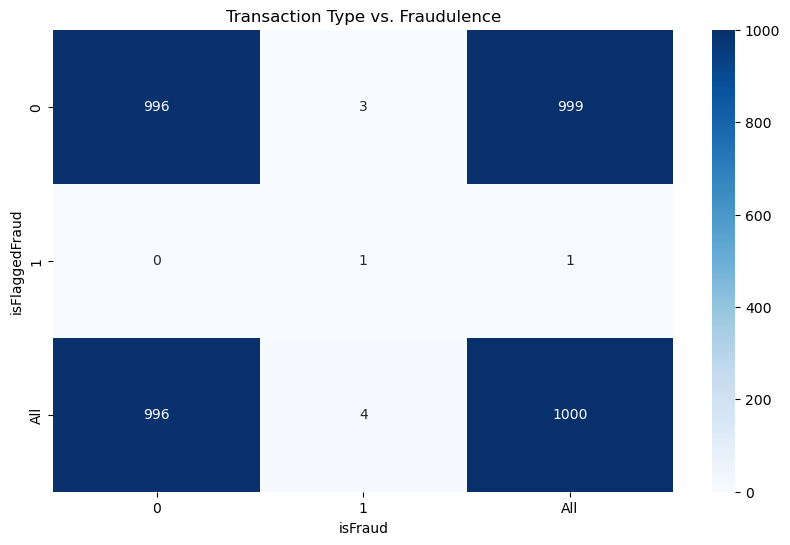

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_2, annot=True, cmap='Blues', fmt='d')
plt.title('Transaction Type vs. Fraudulence')
plt.xlabel('isFraud')
plt.ylabel('isFlaggedFraud')
plt.show()

### What is the distribution of the outcome? 

In [10]:
# Your response here
outcome_counts = subdf_fraud['isFraud'].value_counts()

outcome_counts

isFraud
0    996
1      4
Name: count, dtype: int64

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [11]:
subdf_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [12]:
# Your code here
subdf_fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [13]:
subdf_fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
subdf_fraud['step'].unique()

array([278,  15,  10, 403, 206, 259, 188, 139, 230, 544,  45, 163, 211,
       302,  18, 322, 158, 131, 253, 132, 283,  43, 642, 164, 326,  37,
         9, 157, 406, 235, 346,  19, 208, 332, 304, 686, 226, 201,  14,
       323, 225, 138,  41, 399, 120, 373, 179, 369, 275, 396, 162,  22,
       229, 234, 352, 186, 469, 288, 204, 232, 192,  13, 281, 379, 159,
       324, 405, 380, 307, 404,  36, 401, 228, 236, 297,  12, 300, 564,
       254, 181, 356, 203, 178,  11, 255,  35, 542, 240, 325,   8, 142,
       284, 189, 328, 187, 335, 276, 190,  38, 154, 183, 357, 205, 287,
       514, 231, 250, 378, 349, 252, 161, 202, 354, 333, 571, 257, 353,
       155,  20, 305, 348, 301,   7, 191, 207, 212, 137,  94, 374,  42,
       656, 299, 182, 330,  39, 249, 331, 136, 644, 355,  40, 303, 350,
       227, 590, 177, 184, 185, 382,  95, 129,  44, 393, 306, 289,  46,
       156, 395, 518, 258,  34, 140, 233, 210, 683, 402, 216, 160, 500,
       589, 596, 375, 522, 684, 496, 308, 251, 377, 237,  17, 21

In [15]:
orig=subdf_fraud['nameOrig'].unique()
len(orig)

1000

In [16]:
dest=subdf_fraud['nameDest'].unique()

In [17]:
len(dest)

999

In [18]:
one_hot_encoded = pd.get_dummies(subdf_fraud['type'], prefix='type')

# Concatenate the one-hot encoded columns with the original DataFrame
subdf_fraud = pd.concat([subdf_fraud, one_hot_encoded], axis=1)


In [19]:
columns_to_drop= ['type','step', 'nameOrig','oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest']

In [20]:
subdf_fraud = subdf_fraud.drop(columns= columns_to_drop, inplace=False)

In [21]:
subdf_fraud

,amount,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,330218.42,0,0,True,False,False,False,False
264914,11647.08,0,0,False,False,False,True,False
85647,152264.21,0,0,True,False,False,False,False
5899326,1551760.63,0,0,False,False,False,False,True
2544263,78172.30,0,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...
2248846,62683.33,0,0,True,False,False,False,False
5150547,94341.32,0,0,False,False,False,False,True
6189831,284019.22,0,0,False,True,False,False,False
4589346,198673.78,0,0,True,False,False,False,False


In [26]:
subdf_fraud.dtypes

amount            float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN         bool
type_CASH_OUT        bool
type_DEBIT           bool
type_PAYMENT         bool
type_TRANSFER        bool
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [32]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = subdf_fraud.drop(columns=['isFraud']) 
y = subdf_fraud['isFraud']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression()

# Fit the classifier to the training data
logistic_regression.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = logistic_regression.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print(conf_matrix)

Accuracy: 0.995
[[199   0]
 [  1   0]]


### Now pick a model of your choice and evaluate its accuracy.

In [31]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.995
Confusion Matrix:
[[199   0]
 [  1   0]]


### Which model worked better and how do you know?

# Your response here

The logistic regression model and the KNN model achieved the same accuracy of 99.5%. However, accuracy alone might not provide a complete picture, especially when dealing with imbalanced datasets.

The confusion matrices of the logistic regression and KNN models show the following performance:

Logistic Regression:

True Positives (TP): 199
False Positives (FP): 0
True Negatives (TN): 0
False Negatives (FN): 1

KNN:

True Positives (TP): 199
False Positives (FP): 0
True Negatives (TN): 0
False Negatives (FN): 1

While both models achieved a very high accuracy of 99.5%, further examination of the confusion matrices reveals that they correctly classified all instances of the majority class (class 0), but failed to correctly predict any instances of the minority class (class 1). This indicates that the models might be biased towards the majority class and are not effectively capturing the patterns in the minority class.




### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.